<a href="https://colab.research.google.com/github/jesandovala/Heroes_Classification/blob/master/Heroes_Classificator_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifcation Heroes

## Authentication

In [0]:
import os.path
import numpy as np
import pandas as pd

!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Load File in Zip 

In [0]:
file_id = '1BL8fJwpOJROviyyD1q6YoIXSie86r8WD'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [55]:
!ls

adc.json  DC_COMICS  DC_COMICS-20190223T200855Z-001.zip  sample_data


In [56]:
!unzip DC_COMICS-20190223T200855Z-001.zip > /dev/null

replace DC_COMICS/Logo/images (7).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [57]:
!ls -la

total 35716
drwxr-xr-x  1 root root     4096 Feb 28 23:42 .
drwxr-xr-x  1 root root     4096 Feb 28 23:40 ..
-rw-r--r--  1 root root     2501 Feb 28 23:41 adc.json
drwxr-xr-x  1 root root     4096 Feb 28 23:41 .config
drwxr-xr-x 14 root root     4096 Feb 28 23:42 DC_COMICS
-rw-r--r--  1 root root 36536788 Mar  1 01:09 DC_COMICS-20190223T200855Z-001.zip
drwxr-xr-x  1 root root     4096 Feb 26 17:33 sample_data


In [58]:
!ls

adc.json  DC_COMICS  DC_COMICS-20190223T200855Z-001.zip  sample_data


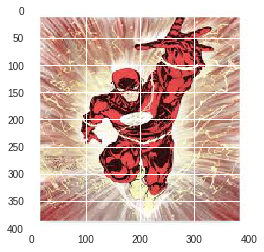

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('DC_COMICS/Flash/8.jpg',target_size=(400,400),interpolation='nearest')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [60]:
!rm 'DC_COMICS/Logo/'

rm: cannot remove 'DC_COMICS/Logo/': Is a directory


In [98]:

count_files = []
path = 'DC_COMICS/' 
folders= os.listdir(path)

for i in folders[:]:
  count_files.append(len([item for item in os.listdir(path+i) if os.path.isfile(os.path.join(path+i, item))]))

count_files = pd.Series(count_files, name = 'Count')
folders =pd.Series(folders, name = 'Folders')
pd.concat([folders, count_files], axis=1)

,Folders,Count
0,Aquaman,163
1,Green Lantern,219
2,Logo,3
3,Shazam,140
4,Ciborg,126
5,Superman,202
6,Batman,112
7,WonderWoman,160
8,NightWing,168
9,Flash,233
